In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 특정 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6000)])
    except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
        print(e)

In [2]:
import os, random, shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from glob import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import DenseNet201
from PIL import Image 

print('a')

a


In [3]:
path_train_new = os.path.join('./data/train_by_category_ver3')

train_list = glob(os.path.join(path_train_new, '*', '*.jpg'))

print(len(train_list))

dir_list = sorted(glob(os.path.join(path_train_new, '*')))

print(dir_list)

train_dir = './data/train_by_category_ver3'

tmplist = []
for i in dir_list:
    tmplist.append(i[30:])

print(tmplist)

57250
['./data/train_by_category_ver3/cardigan', './data/train_by_category_ver3/coat', './data/train_by_category_ver3/dress', './data/train_by_category_ver3/hat', './data/train_by_category_ver3/jacket', './data/train_by_category_ver3/jumpsuit', './data/train_by_category_ver3/pants', './data/train_by_category_ver3/shirt, blouse', './data/train_by_category_ver3/shoe', './data/train_by_category_ver3/shorts', './data/train_by_category_ver3/skirt', './data/train_by_category_ver3/tights, stockings', './data/train_by_category_ver3/top, t-shirt, sweatshirt']
['cardigan', 'coat', 'dress', 'hat', 'jacket', 'jumpsuit', 'pants', 'shirt, blouse', 'shoe', 'shorts', 'skirt', 'tights, stockings', 'top, t-shirt, sweatshirt']


In [4]:
train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

batch_size=20

# classes=[str(x) for x in range(len(dir_list))]
classes = tmplist

print(classes)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=classes, 
    target_size=(299,299),
    batch_size=batch_size, 
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=classes,
    target_size=(299,299),
    batch_size=batch_size, 
    class_mode='categorical',
    subset='validation')

nr_of_classes = len(train_generator.class_indices)
print(nr_of_classes)

['cardigan', 'coat', 'dress', 'hat', 'jacket', 'jumpsuit', 'pants', 'shirt, blouse', 'shoe', 'shorts', 'skirt', 'tights, stockings', 'top, t-shirt, sweatshirt']
Found 45804 images belonging to 13 classes.
Found 11446 images belonging to 13 classes.
13


x_data shape :  (20, 299, 299, 3)
t_data shape :  (20, 13)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


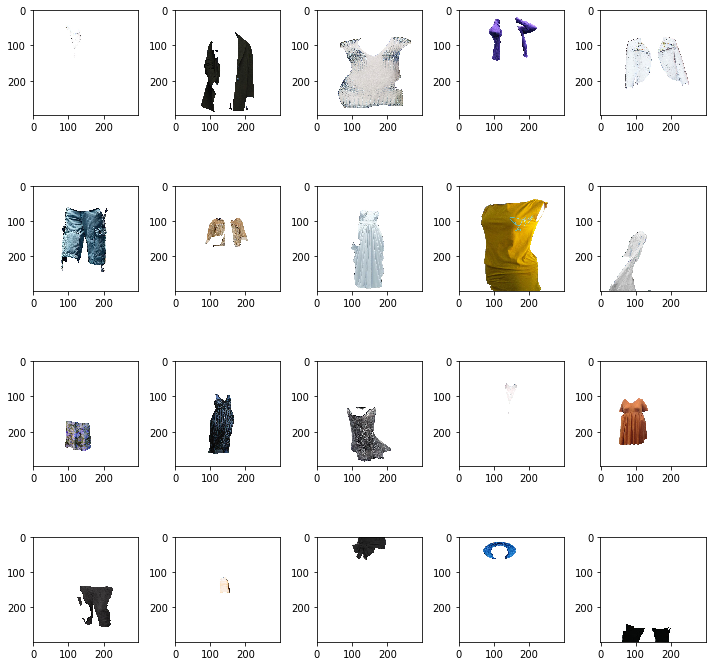

In [5]:
for x_data, t_data in train_generator:
    print('x_data shape : ', x_data.shape) # (20,299,299,3)
    print('t_data shape : ', t_data.shape) # (20,)
    break;

fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))
    
for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data): # idx => 0~19 , img_data =>(150,150,3)
        axs[idx].imshow(img_data)
    print(t_data)
    break;
    
fig.tight_layout()
plt.show()


In [6]:
# tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',  # 검증 정확도 모니터링
#                                                    patience=5),             # 1 epoch보다 더 길게 정확도 향상되지 않으면 훈련 중지
                  
                 
callbacks_list = [tf.keras.callbacks.ModelCheckpoint(filepath='./classifier_category_model_DenseNet201_1219_finetune.h5',
                                                     monitor='val_loss',    # 검증 loss 모니터링
                                                     save_best_only=True),  # 가장 좋은 모델을 저장
                  
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',  # 검증 loss 모니터링
                                                      factor=0.1,           # 콜백 호출시 학습률 10배로 줄임
                                                      patience=5)]          # 검증손실이 해당 epoch만큼 좋아지지 않으면 콜백 호출

In [7]:
    
conv_base = DenseNet201(weights='imagenet',
              include_top=False,
              input_shape=(299, 299, 3))

print(conv_base.summary())

conv_base.trainable = True  # Convolution Layer 동결


# model.add(conv_base)


Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 305, 305, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

Total params: 18,321,984
Trainable params: 18,092,928
Non-trainable params: 229,056
__________________________________________________________________________________________________
None


In [9]:

print("Number of layers in the base model: ", len(conv_base.layers))


# 해당 층 이후부터 미세 조정
fine_tune_at = 500

# `fine_tune_at` 층 이전의 모든 층을 고정
for layer in conv_base.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  707


In [10]:
model = Sequential()

model.add(conv_base)
model.add(GlobalAveragePooling2D())

model.add(Flatten())    
model.add(Dropout(rate=0.5))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=13, activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 9, 9, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               983552    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6

In [11]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_generator,
                    steps_per_epoch=500,
                    epochs=30,
                    callbacks=callbacks_list,
                    validation_data=validation_generator,
                    validation_steps=50)
                    
# (len(train_list)*0.8)/batch_size
# (len(train_list)*0.2)/batch_size

Epoch 1/30
500/500 [==============================] - 479s 958ms/step - loss: 1.4881 - accuracy: 0.5246 - val_loss: 0.7732 - val_accuracy: 0.7580 - lr: 1.0000e-04
Epoch 2/30
500/500 [==============================] - 458s 917ms/step - loss: 0.9584 - accuracy: 0.6930 - val_loss: 0.6739 - val_accuracy: 0.7840 - lr: 1.0000e-04
Epoch 3/30
500/500 [==============================] - 454s 908ms/step - loss: 0.8391 - accuracy: 0.7274 - val_loss: 0.5562 - val_accuracy: 0.8150 - lr: 1.0000e-04
Epoch 4/30
500/500 [==============================] - 465s 929ms/step - loss: 0.7756 - accuracy: 0.7461 - val_loss: 0.5468 - val_accuracy: 0.8070 - lr: 1.0000e-04
Epoch 5/30
500/500 [==============================] - 468s 935ms/step - loss: 0.7275 - accuracy: 0.7596 - val_loss: 0.5424 - val_accuracy: 0.8170 - lr: 1.0000e-04
Epoch 6/30
500/500 [==============================] - 460s 921ms/step - loss: 0.6895 - accuracy: 0.7790 - val_loss: 0.5585 - val_accuracy: 0.8180 - lr: 1.0000e-04
Epoch 7/30
500/500 [==

In [11]:
# 기학습 된 모델 불러오기
model = tf.keras.models.load_model('./classifier_category_model_DenseNet201_1219_finetune.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


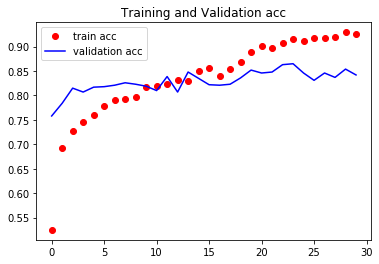

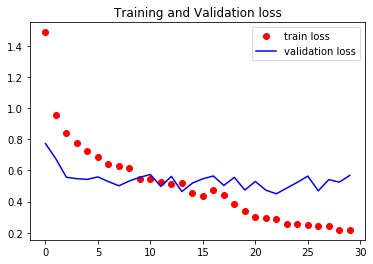

In [13]:
print(history.history.keys())

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, 'bo', color='r', label='train acc')
plt.plot(val_acc, 'b', color='b', label='validation acc')
plt.title('Training and Validation acc')
plt.legend()
plt.show()

plt.plot(train_loss, 'bo', color='r', label='train loss')
plt.plot(val_loss, 'b', color='b', label='validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()